In [44]:
import scipy.io as sc
faces = sc.loadmat('face.mat')

In [18]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
faces_content = sio.loadmat('face.mat')
faces_content


{'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

## Now we will split data into training and test using ratio of 80%-20%

(2576, 416)
(2576, 104)
[[221  99  58 ...  93 227 100]
 [225 100  58 ...  95 232 102]
 [226 100  57 ...  81 235 132]
 ...
 [ 79 114 167 ...  88  43  44]
 [ 78 118 171 ... 100  45  44]
 [ 80 120 171 ...  91  46  47]]
[[38 40  6 28  7 41 32 24  8 22  1 44 36 30 32 51 48 17  1 25 46  1 42 47
  23 33 18 33 20 15 13 46  6 20 42 44 52 42 28  6 50 22  4 39 30 21 20  6
   8  3 22  1 46 43 40  1 15 27 14 22 13  3  7  3 48  2 18 41 48 20  7 52
  26  9 38 32 19 51 49 17 51 40 21 23 34 51  6 20 25 31 36 17 11 34  7 37
  19 46 47 32  9 44 35 42 10 52 49 46 30 10  2 35 20 15 16 16 50 51 17  9
  25 29  7 33 32 15 11 42  1 44 23  2 15 28 52  4 12 49 11 28 33 18 27 12
  17 45 13 41 12 38 37 35 14 37 26 30 41 42 26 24 14  4 51  5  7 20 29 48
  31 22  8  4 31  3 39 52 49 22  3 36 31 16 36 37 14 22 11 42 37 40 22 41
  19 22 45 21 24 26  7  3 22 31 23 13 12 17 45 42  5 28 46  8 33 34  2 29
  44 26 23 17  9 12 51 12 15 16  2 36 34 11 38 14 24 27 41 32 33 43 25 35
  41  2 33 30 27 23 41  1 37 13 29 29  8 19 

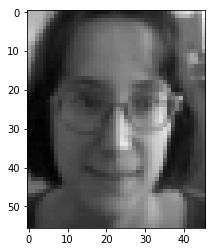

In [19]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import collections 
from itertools import groupby

face_data = faces_content['X']
face_id = faces_content['l']

X_train, X_test = train_test_split(face_data.T, test_size = 0.2, random_state = 0)
Y_train, Y_test = train_test_split(face_id.T, test_size = 0.2, random_state = 0)

face_train = X_train.T
face_train_id = Y_train.T
face_test = X_test.T
face_test_id = Y_test.T

print(face_train.shape)
print(face_test.shape)
print(face_train)
print(face_train_id)
print(face_test_id)

face_5 = np.reshape(face_train[:,50],(46,56))
plt.imshow(face_5.T, cmap = 'gist_gray')

#face_n = np.reshape(face_data[:,379],(46,56))
#plt.imshow(face_n.T, cmap = 'gist_gray')

#idx_trainid=np.argsort(np.abs(face_train_id)) #sort the eigenavalues in descending order
#face_train_id_sort = face_train_id[idx_trainid]
print(face_train_id)

#print([len(list(group)) for key, group in groupby(face_train_id)])


    

### As can be seen, the training data of pixels corresponds to the training data of IDs. Next up, we will perform PCA, ie find the eigenvectors and eigenvalues. We don't need to normalise and centralise the data.

(2576,)
(2576,)


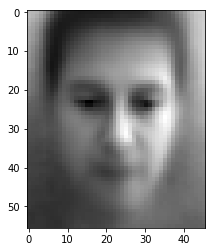

In [20]:
average_face=np.average(face_train.T, axis = 0)
print(average_face.shape)
face_aver = np.reshape(average_face,(46,56))
plt.imshow(face_aver.T, cmap = 'gist_gray')

average_face_test = np.average(face_test.T, axis = 0)
print(average_face_test.shape)
#face_aver_test = np.reshape(average_face_test,(46,56))
#plt.imshow(face_aver_test.T, cmap = 'gist_gray')

### Average looks alright

In [21]:
norm_face_t = face_train.T - average_face.T
norm_face = norm_face_t.T
print(norm_face)
print('suka')
print(norm_face)
print(norm_face.shape)

[[ 97.05288462 -24.94711538 -65.94711538 ... -30.94711538 103.05288462
  -23.94711538]
 [101.25480769 -23.74519231 -65.74519231 ... -28.74519231 108.25480769
  -21.74519231]
 [105.19471154 -20.80528846 -63.80528846 ... -39.80528846 114.19471154
   11.19471154]
 ...
 [ -7.82932692  27.17067308  80.17067308 ...   1.17067308 -43.82932692
  -42.82932692]
 [ -6.69471154  33.30528846  86.30528846 ...  15.30528846 -39.69471154
  -40.69471154]
 [ -3.04086538  36.95913462  87.95913462 ...   7.95913462 -37.04086538
  -36.04086538]]
suka
[[ 97.05288462 -24.94711538 -65.94711538 ... -30.94711538 103.05288462
  -23.94711538]
 [101.25480769 -23.74519231 -65.74519231 ... -28.74519231 108.25480769
  -21.74519231]
 [105.19471154 -20.80528846 -63.80528846 ... -39.80528846 114.19471154
   11.19471154]
 ...
 [ -7.82932692  27.17067308  80.17067308 ...   1.17067308 -43.82932692
  -42.82932692]
 [ -6.69471154  33.30528846  86.30528846 ...  15.30528846 -39.69471154
  -40.69471154]
 [ -3.04086538  36.95913462

### covariance matrix S

In [22]:
N=416

S = np.dot(norm_face,norm_face.T)/N
print(S)
print(S.shape)

[[2717.76643399 2574.59950536 2344.8671066  ... -539.14123752
  -585.75412583 -572.52908885]
 [2574.59950536 2794.33891919 2634.29894369 ... -533.05550804
  -576.92153985 -569.14824103]
 [2344.8671066  2634.29894369 2752.85872203 ... -530.12457817
  -569.28540472 -551.53050458]
 ...
 [-539.14123752 -533.05550804 -530.12457817 ... 2877.43000532
  2743.60654933 2622.85312847]
 [-585.75412583 -576.92153985 -569.28540472 ... 2743.60654933
  2963.05343357 2858.15430265]
 [-572.52908885 -569.14824103 -551.53050458 ... 2622.85312847
  2858.15430265 3003.77958002]]
(2576, 2576)


### find eigvals and eigvecs of S


In [23]:
eigvals, eigvecs = np.linalg.eig(S)

print(eigvals)
print('suka')
print(eigvecs)
print(eigvals.shape)
print(eigvecs.shape)

eigvecs_float = eigvecs.astype('float64')

[ 9.56846588e+05+0.j  5.31930209e+05+0.j  4.55028542e+05+0.j ...
 -8.03938822e-14+0.j  1.43613511e-13+0.j  9.47626104e-14+0.j]
suka
[[-1.14878149e-02+0.j  1.78896422e-02+0.j -1.52988695e-02+0.j ...
   7.25045416e-04+0.j -1.13614457e-03+0.j  8.00404069e-04+0.j]
 [-1.24027394e-02+0.j  1.75147272e-02+0.j -1.62413323e-02+0.j ...
   1.38671296e-04+0.j -4.41190631e-04+0.j  3.40457594e-04+0.j]
 [-1.30041096e-02+0.j  1.65703203e-02+0.j -1.86062571e-02+0.j ...
   9.07569072e-05+0.j -2.05312051e-04+0.j  1.71830159e-04+0.j]
 ...
 [ 2.85477901e-03+0.j -4.96944794e-02+0.j -1.62049717e-03+0.j ...
   2.69652490e-03+0.j  4.67455385e-03+0.j -8.82099720e-03+0.j]
 [ 2.64786517e-03+0.j -4.86687095e-02+0.j -1.53852128e-03+0.j ...
  -2.79952215e-02+0.j -1.87884519e-02+0.j  1.85797064e-02+0.j]
 [ 2.25930783e-03+0.j -4.97091470e-02+0.j -6.67263909e-05+0.j ...
   2.71343890e-02+0.j  9.38745015e-04+0.j  2.64035748e-03+0.j]]
(2576,)
(2576, 2576)


/Users/adilzhannussipzhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


/Users/adilzhannussipzhan/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


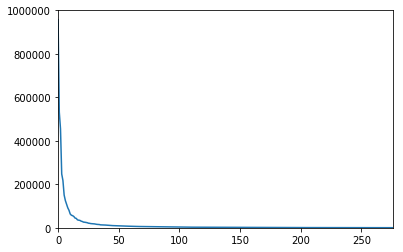

In [24]:
x=np.arange(0, 2576, 1)


plt.axis([0,276,0,1000000])
plt.plot(eigvals)

### calculating M

In [25]:
idx=np.argsort(np.abs(eigvals))[::-1] #sort the eigenavalues in descending order
eigvals_sort = eigvals[idx]
print(eigvals_sort)
eigvecs_sort = eigvecs[idx]
print(eigvecs_sort)



b = sum(eigvals)
print(b)

b_14 = sum(eigvals[0:13]) #13 eigenvalues give 70.56% reconstruction accuracy
print(b_14/b)

b_27 = sum(eigvals[0:26]) #13 eigenvalues give 80.12% reconstruction accuracy
print(b_27/b)

b_66 = sum(eigvals[0:65]) #13 eigenvalues give 90.06% reconstruction accuracy
print(b_66/b)

b_123 = sum(eigvals[0:122]) #13 eigenvalues give 95.01% reconstruction accuracy
print(b_123/b)

b_270 = sum(eigvals[0:269]) #13 eigenvalues give 99.00% reconstruction accuracy
print(b_270/b)



[ 9.56846588e+05+0.j  5.31930209e+05+0.j  4.55028542e+05+0.j ...
  1.43613511e-13+0.j  9.47626104e-14+0.j -8.03938822e-14+0.j]
[[-1.14878149e-02+0.j  1.78896422e-02+0.j -1.52988695e-02+0.j ...
   7.25045416e-04+0.j -1.13614457e-03+0.j  8.00404069e-04+0.j]
 [-1.24027394e-02+0.j  1.75147272e-02+0.j -1.62413323e-02+0.j ...
   1.38671296e-04+0.j -4.41190631e-04+0.j  3.40457594e-04+0.j]
 [-1.30041096e-02+0.j  1.65703203e-02+0.j -1.86062571e-02+0.j ...
   9.07569072e-05+0.j -2.05312051e-04+0.j  1.71830159e-04+0.j]
 ...
 [ 2.64786517e-03+0.j -4.86687095e-02+0.j -1.53852128e-03+0.j ...
  -2.79952215e-02+0.j -1.87884519e-02+0.j  1.85797064e-02+0.j]
 [ 2.25930783e-03+0.j -4.97091470e-02+0.j -6.67263909e-05+0.j ...
   2.71343890e-02+0.j  9.38745015e-04+0.j  2.64035748e-03+0.j]
 [ 2.85477901e-03+0.j -4.96944794e-02+0.j -1.62049717e-03+0.j ...
   2.69652490e-03+0.j  4.67455385e-03+0.j -8.82099720e-03+0.j]]
(4453595.684160045+0j)
(0.7056450621729968+0j)
(0.8012852161774592+0j)
(0.900596652973705+0j)

#### low-dimensional computation of eigenspace

##### covariance S for low-dimensional

In [26]:
N=416

S_l = np.dot(norm_face.T, norm_face)/N
print(S_l)
print(S_l.shape)

[[11120.31315522 -2214.71980521  1658.43828234 ...  3244.83321809
   2407.66392607 -2700.20243511]
 [-2214.71980521  8490.92992667  -794.74371655 ... -2851.31993465
    514.4675041  -1111.58876092]
 [ 1658.43828234  -794.74371655 12801.05139024 ...  7184.66988368
  -2507.10277373 -2554.08932722]
 ...
 [ 3244.83321809 -2851.31993465  7184.66988368 ... 10984.01433865
  -1217.92658799 -3357.46842993]
 [ 2407.66392607   514.4675041  -2507.10277373 ... -1217.92658799
   8587.78633153   583.93198958]
 [-2700.20243511 -1111.58876092 -2554.08932722 ... -3357.46842993
    583.93198958 10609.20985918]]
(416, 416)


#### find eigvals and eigvecs of low-dimensional 

In [27]:
eigvals_l, eigvecs_l = np.linalg.eig(S_l)

print(eigvals_l)
print('suka_l')
print(eigvecs_l)
print(eigvals_l.shape)
print(eigvecs_l.shape)


[9.56846588e+05 5.31930209e+05 4.55028542e+05 2.47519052e+05
 2.17529060e+05 1.50795820e+05 1.25404454e+05 1.08171761e+05
 9.18498578e+04 8.05238976e+04 6.36102099e+04 5.77240021e+04
 5.57243495e+04 5.19129505e+04 4.47718605e+04 4.31749014e+04
 3.64876109e+04 3.50021286e+04 3.40560838e+04 3.05874009e+04
 2.88847080e+04 2.61001995e+04 2.56341239e+04 2.44990669e+04
 2.35450175e+04 2.12865247e+04 2.06115479e+04 1.93673065e+04
 1.89236049e+04 1.86146507e+04 1.79129756e+04 1.67184004e+04
 1.58131487e+04 1.55308035e+04 1.49946296e+04 1.35850897e+04
 1.34292370e+04 1.31343746e+04 1.26001094e+04 1.26542655e+04
 1.21000313e+04 1.18295913e+04 1.09578825e+04 1.06277944e+04
 1.04290716e+04 1.00995160e+04 9.96023898e+03 9.65659389e+03
 9.49928860e+03 9.32976629e+03 8.96974821e+03 8.83025841e+03
 8.56746244e+03 8.34148517e+03 8.07180128e+03 7.89363256e+03
 7.70072242e+03 7.68016086e+03 7.36615272e+03 7.29063341e+03
 6.98979097e+03 6.75036454e+03 6.63617135e+03 6.54093958e+03
 6.28374332e+03 6.217213

In [28]:
#checking that first 416 eigvals are the same
su = sum(eigvals[0:415])
su_l = sum(eigvals_l)

print(su-su_l)



(5.587935447692871e-09+0j)


# Reconstructed face 

In [78]:
M=100

PCA = np.array([eigvecs[:,i] for i in range (M)])
print(eigvecs_sort.shape)
print(PCA.T.shape)

#A = norm_face[:,55].T*(eigvecs[:,1]+eigvecs[:,2]+eigvecs[:,3]+eigvecs[:,4]+eigvecs[:,5]+eigvecs[:,6]+eigvecs[:,7]+eigvecs[:,8]+eigvecs[:,9]+eigvecs[:,10]+eigvecs[:,11]+eigvecs[:,12]+eigvecs[:,13]+eigvecs[:,14]+eigvecs[:,15]+eigvecs[:,16]+eigvecs[:,17]+eigvecs[:,18]+eigvecs[:,19])

print(norm_face.shape)

A = np.dot(norm_face[:,1].T, PCA.T)
print(A.shape)


(2576, 2576)
(2576, 100)
(2576, 416)
(100,)


[109.04841948 106.74693888 101.51041468 ...  99.25766002  92.67459186
  97.10274888]
(2576,)


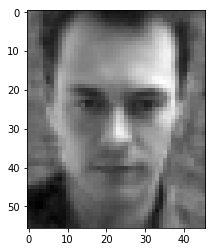

In [79]:
A_reconstruct = average_face + np.dot(A, PCA)

print(A_reconstruct.real)
print(A_reconstruct.shape)

A_reconstruct = A_reconstruct.real


face_recon = A_reconstruct.reshape(46,56)
plt.imshow(face_recon.T, cmap = 'gist_gray')

## Nearest Neighbor Classification

In [277]:
face_test_n_transform = face_test.T - average_face_test.T
face_test_n = face_test_n_transform.T
print(face_test_n.shape)



(2576, 104)


In [269]:
from sklearn.neighbors import KNeighborsClassifier

N = 416
PP = 104

PCA = np.array([eigvecs[:,i] for i in range (M)])
W = np.array([np.dot(face_test_n[:,P].T, PCA.T) for P in range (PP)]) #this thing changed for all the arrays (matrices in matrix)
print(W)
#W_i = np.array([norm_face[:,i] for i in range (N)])

Wn = np.dot(norm_face.T, PCA.T) 


# Wn= Wn.reshape(1,-1)

#classifier = KNeighborsClassifier(n_neighbors = 1)
#classifier.fit(Wn.T, face_train_id.T.ravel())
#face_predict = classifier.predict(face_test)


Norm = np.array([np.linalg.norm(W - Wn[i,:]) for i in range (N)]) 
print(Norm.shape)
print(Norm)
min_norm = min(Norm)
print(min_norm)
index_min = Norm.argmin()
print(index_min)



[[ 475.70679148+0.j -903.49080329+0.j -338.08577207+0.j ...
    90.80692668+0.j   35.42071678+0.j   82.51491296+0.j]
 [ 428.86685029+0.j -635.61212264+0.j  295.13213514+0.j ...
   -29.09285556+0.j   67.36505751+0.j  111.18824262+0.j]
 [ 693.5469813 +0.j  314.37953576+0.j -333.44536398+0.j ...
   -45.2760749 +0.j  -37.29053356+0.j  -34.3545113 +0.j]
 ...
 [-589.10760016+0.j  -58.63513265+0.j  574.50126662+0.j ...
    24.16929229+0.j   32.15877427+0.j  -20.12422587+0.j]
 [-408.12446495+0.j -676.94623882+0.j  277.59980319+0.j ...
   -43.92220475+0.j  -67.53845861+0.j   29.17713741+0.j]
 [-858.29118612+0.j  -98.60254411+0.j -797.00405441+0.j ...
  -167.21314896+0.j   15.97957674+0.j   -2.07538185+0.j]]
(416,)
[29072.14732545 27107.71552725 30229.5055721  28317.36070284
 30149.74364164 24484.16128769 23754.87031066 28359.208406
 26402.05775407 31228.18626589 30855.91223748 27831.97493974
 28013.90286898 27880.3350128  30224.42712251 26585.45065276
 23547.38755253 24742.26732734 27731.925954

In [257]:
print(face_train_id.shape)
face_train_id_arg = face_train_id[0, index_min]
print(face_train_id_arg)


(1, 416)
32


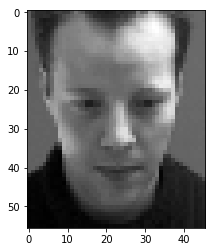

In [258]:
test_image_nn = face_test[:,P].reshape(46,56)
plt.imshow(test_image_nn.T, cmap = 'gist_gray')

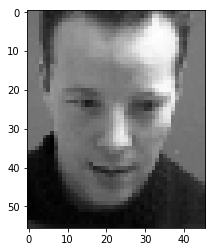

In [259]:
train_image_nn = face_train[:,index_min].reshape(46,56)
plt.imshow(train_image_nn.T, cmap = 'gist_gray')

In [247]:
from sklearn.metrics import accuracy_score
#accuracy_score(face_train_id_arg, face_test_id[:,0])


need to check all the faces from NN classification somehow, then need to do alternative method

In [276]:
classifier = KNeighborsClassifier(n_neighbors = 1)
print(Wn.shape)
print(face_train_id.T.ravel().shape)
classifier.fit(Wn, face_train_id.T.ravel())
print(face_test.shape)
face_predict = classifier.predict(face_test)


(416, 100)
(416,)
(2576, 104)


/Users/adilzhannussipzhan/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


ValueError: query data dimension must match training data dimension